# Pulling Budget information from Jerry's code.

## Attempting to use merging code to make budget graphs from my Rotten Tomatoes data

In [1]:
import pandas as pd
import json
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = sqlite3.connect("Prebuilt_stuff/data/movies.db")
sns.set_style('whitegrid')
sns.set_context("talk")

### Importing Jerry's code

In [2]:
budget_main = pd.read_csv("Prebuilt_stuff/data/main_data_compilation.csv")

In [3]:
budget_main.drop(columns='Unnamed: 0', inplace=True)

In [4]:
budget_main["title"] = budget_main["title"].str.lower().str.replace('[^a-zA-Z0-9]', '_').copy()
clean_budget_main = budget_main.drop_duplicates("title")

Importing my previous work into this folder for merging

In [5]:
clean_title = pd.read_csv("Prebuilt_stuff/data/rotten_tomatoes_clean_titles.csv")

In [6]:
clean_title = clean_title.loc[clean_title['where'].apply(lambda x: x == "both")].copy()

In [7]:
clean_title.columns

Index(['Unnamed: 0', 'title', 'production_company', 'audience_status',
       'audience_rating', 'audience_count', 'clean_titles', 'where'],
      dtype='object')

In [8]:
clean_title.drop(columns=['Unnamed: 0','where','clean_titles'], inplace=True)

In [9]:
clean_title

,title,production_company,audience_status,audience_rating,audience_count
2,iron_man_2,Paramount Studios,Upright,71.0,480879.0
3,toy_story,Buena Vista,Upright,92.0,1109209.0
4,inception,Warner Bros. Pictures,Upright,91.0,571078.0
5,percy_jackson___the_olympians__the_lightning_t...,20th Century Fox,Spilled,53.0,254421.0
6,avatar,20th Century Fox,Upright,82.0,1382566.0
...,...,...,...,...,...
24760,the_bubble,Strand Releasing,Upright,84.0,4672.0
24812,time_for_ilhan,Gooddocs,Spilled,42.0,61.0
24817,undiscovered,Lions Gate Films,Spilled,48.0,9311.0
24905,hari_kondabolu__warn_your_relatives,Netflix,Spilled,53.0,21.0


In [10]:
rotten_budget_df = clean_budget_main.merge(clean_title, on=["title"], how="inner").copy()

In [11]:
rotten_budget_df

,popularity,title,vote_average,vote_count,vote_total,runtime_minutes,genre,production_budget,worldwide_gross,worldwide_profit,release_date,percent_returns,production_company,audience_status,audience_rating,audience_count
0,28.515,iron_man_2,6.8,12368,84102.4,124.0,Action,170000000,621156389,451156389,2010-05-07,365.386111,Paramount Studios,Upright,71.0,480879.0
1,27.920,inception,8.3,22186,184143.8,148.0,Action,160000000,835524642,675524642,2010-07-16,522.202901,Warner Bros. Pictures,Upright,91.0,571078.0
2,26.691,percy_jackson___the_olympians__the_lightning_t...,6.1,4229,25796.9,118.0,Adventure,95000000,223050874,128050874,2010-02-11,234.790394,20th Century Fox,Spilled,53.0,254421.0
3,26.526,avatar,7.4,18676,138202.4,93.0,Horror,425000000,2776345279,2351345279,2009-12-18,653.257713,20th Century Fox,Upright,82.0,1382566.0
4,24.445,toy_story_3,7.7,8340,64218.0,103.0,Adventure,200000000,1068879522,868879522,2010-06-17,534.439761,Walt Disney Pictures,Upright,89.0,607537.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,1.836,bad_company,10.0,1,10.0,87.0,Thriller,70000000,69157016,-842984,2018-08-14,98.795737,Buena Vista Pictures,Spilled,31.0,5713.0
1589,1.836,bad_company,10.0,1,10.0,87.0,Thriller,70000000,69157016,-842984,2018-08-14,98.795737,Touchstone Pictures,Spilled,35.0,56694.0
1590,1.400,molly,5.8,5,29.0,91.0,Action,21000000,17396,-20982604,2018-09-25,0.082838,MGM Home Entertainment,Spilled,53.0,2101.0
1591,0.840,the_box,8.0,1,8.0,89.0,Drama,25000000,34356760,9356760,2018-03-04,137.427040,Warner Bros. Pictures,Spilled,24.0,359098.0


In [79]:
clean_unique_titles = rotten_budget_df.drop_duplicates("title")
clean_unique_titles

,popularity,title,vote_average,vote_count,vote_total,runtime_minutes,genre,production_budget,worldwide_gross,worldwide_profit,release_date,percent_returns,production_company,audience_status,audience_rating,audience_count
0,28.515,iron_man_2,6.8,12368,84102.4,124.0,Action,170000000,621156389,451156389,2010-05-07,365.386111,Paramount Studios,Upright,71.0,480879.0
1,27.920,inception,8.3,22186,184143.8,148.0,Action,160000000,835524642,675524642,2010-07-16,522.202901,Warner Bros. Pictures,Upright,91.0,571078.0
2,26.691,percy_jackson___the_olympians__the_lightning_t...,6.1,4229,25796.9,118.0,Adventure,95000000,223050874,128050874,2010-02-11,234.790394,20th Century Fox,Spilled,53.0,254421.0
3,26.526,avatar,7.4,18676,138202.4,93.0,Horror,425000000,2776345279,2351345279,2009-12-18,653.257713,20th Century Fox,Upright,82.0,1382566.0
4,24.445,toy_story_3,7.7,8340,64218.0,103.0,Adventure,200000000,1068879522,868879522,2010-06-17,534.439761,Walt Disney Pictures,Upright,89.0,607537.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,2.919,little_women,6.8,11,74.8,112.0,Drama,15000000,50003303,35003303,2018-09-28,333.355353,WARNER BROTHERS PICTURES,Upright,78.0,9776.0
1587,1.836,bad_company,10.0,1,10.0,87.0,Thriller,70000000,69157016,-842984,2018-08-14,98.795737,Paramount Pictures,Upright,71.0,2298.0
1590,1.400,molly,5.8,5,29.0,91.0,Action,21000000,17396,-20982604,2018-09-25,0.082838,MGM Home Entertainment,Spilled,53.0,2101.0
1591,0.840,the_box,8.0,1,8.0,89.0,Drama,25000000,34356760,9356760,2018-03-04,137.427040,Warner Bros. Pictures,Spilled,24.0,359098.0


In [109]:
production_company = clean_unique_titles.drop(columns=["vote_average", "vote_count","vote_total","popularity","runtime_minutes","release_date", "audience_status","audience_rating","audience_count"]).copy()
production_company

,title,genre,production_budget,worldwide_gross,worldwide_profit,percent_returns,production_company
0,iron_man_2,Action,170000000,621156389,451156389,365.386111,Paramount Studios
1,inception,Action,160000000,835524642,675524642,522.202901,Warner Bros. Pictures
2,percy_jackson___the_olympians__the_lightning_t...,Adventure,95000000,223050874,128050874,234.790394,20th Century Fox
3,avatar,Horror,425000000,2776345279,2351345279,653.257713,20th Century Fox
4,toy_story_3,Adventure,200000000,1068879522,868879522,534.439761,Walt Disney Pictures
...,...,...,...,...,...,...,...
1584,little_women,Drama,15000000,50003303,35003303,333.355353,WARNER BROTHERS PICTURES
1587,bad_company,Thriller,70000000,69157016,-842984,98.795737,Paramount Pictures
1590,molly,Action,21000000,17396,-20982604,0.082838,MGM Home Entertainment
1591,the_box,Drama,25000000,34356760,9356760,137.427040,Warner Bros. Pictures


In [141]:
clean_unique_titles.shape

(1428, 16)

In [140]:
# gapminder_2002 = gapminder[gapminder['year']==2002]
adventure = clean_unique_titles[clean_unique_titles['genre']==("Adventure")]
adventure.shape

(140, 16)

In [108]:
production_company["production_company"] = production_company["production_company"].str.lower().str.replace('[^a-zA-Z0-9]', '_').copy()
production_company["production_company"].unique()

array(['paramount_studios', 'warner_bros__pictures', '20th_century_fox',
       'walt_disney_pictures', 'universal_pictures', 'film_chest',
       'lionsgate_films', 'summit_entertainment', 'paramount_pictures',
       'columbia_pictures', 'buena_vista_pictures', 'paramount',
       'walt_disney_studios', 'sony_pictures', 'slamdance_on_the_road',
       'fox_searchlight', 'magnolia_pictures', 'paramount_home_video',
       'anchor_bay_films', 'lionsgate', 'universal_studios',
       'overture_films', 'screen_gems', 'warner_home_video',
       'koch_vision', 'media_home_entertainment', 'touchstone_pictures',
       'sony_pictures_classics', 'mgm', 'fox_searchlight_pictures',
       'focus_features', 'drafthouse_films', 'roadside_attractions',
       'new_line_cinema', 'anchor_bay', 'united_artists', 'ato_pictures',
       'sony_classics', 'freestyle_releasing', 'weinstein_company', 'ifc',
       'lorimar_productions', 'yari_film_group', 'magnolia_releasing',
       's_ville_pictures', '

In [90]:
pc_wwp = production_company.sort_values("worldwide_profit", ascending=False).head(50).copy()
pc_wwp

,title,genre,production_budget,worldwide_gross,worldwide_profit,percent_returns,production_company
3,avatar,Horror,425000000,2776345279,2351345279,653.257713,20th Century Fox
1487,avengers__infinity_war,Action,300000000,2048134200,1748134200,682.711400,Walt Disney Pictures
1041,jurassic_world,Action,215000000,1648854864,1433854864,766.909239,Universal Pictures
1044,furious_7,Action,190000000,1518722794,1328722794,799.327786,Universal Pictures
443,the_avengers,Action,225000000,1517935897,1292935897,674.638176,Warner Bros. Pictures
405,black_panther,Action,200000000,1348258224,1148258224,674.129112,Marvel Studios
1495,jurassic_world__fallen_kingdom,Action,170000000,1305772799,1135772799,768.101646,Universal Pictures
90,frozen,Adventure,150000000,1272469910,1122469910,848.313273,Anchor Bay
445,beauty_and_the_beast,Drama,160000000,1259199706,1099199706,786.999816,Buena Vista
1124,minions,Adventure,74000000,1160336173,1086336173,1568.021855,Universal Pictures


<AxesSubplot:xlabel='production_company', ylabel='worldwide_profit'>

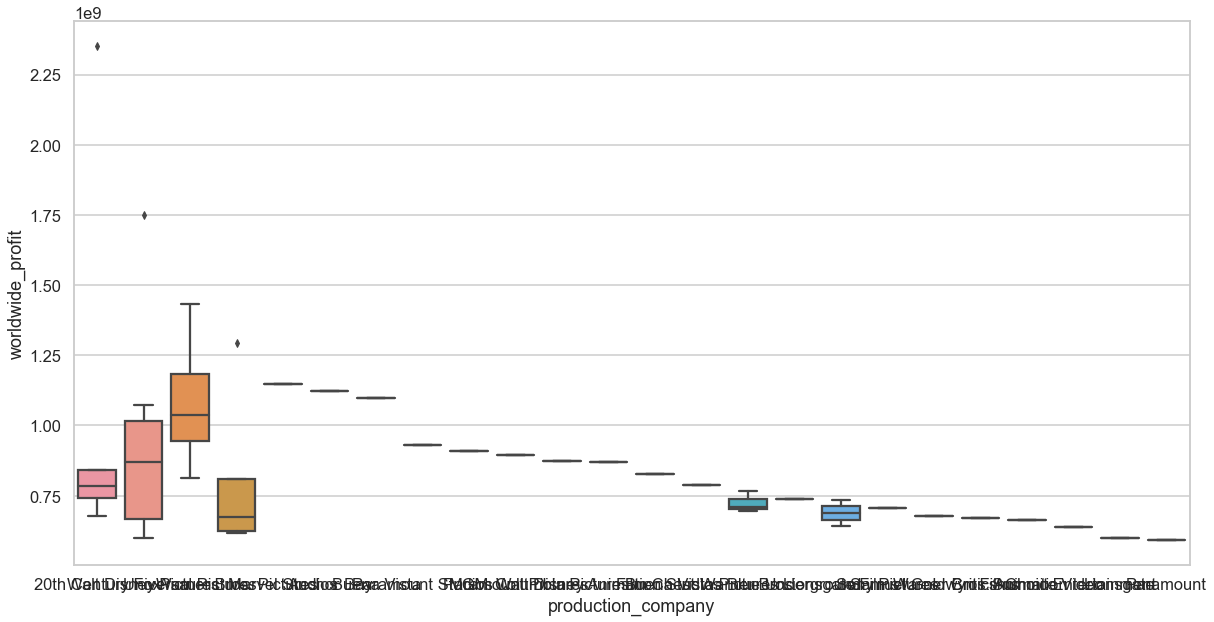

In [95]:
fig, ax = plt.subplots(figsize = (20,10))
sns.boxplot(data = pc_wwp, x ="production_company", y ="worldwide_profit")

In [12]:
# Attempt to make sense out of the mixed dataframe, possibly a different graph, scatter plot or line plot might work out.
# main_plot = sns.lmplot(data = rotten_budget_df, x = "audience_count", y = 'audience_rating', legend = True, markers=".", line_kws={'color': 'red'})

In [13]:
rotten_budget_df2 = rotten_budget_df.sort_values("worldwide_profit", ascending=False).head(50).copy()

In [14]:
rotten_budget_df1 = rotten_budget_df.sort_values("percent_returns", ascending=False).head(50).copy()

In [15]:
rotten_budget_df2.describe()

,popularity,vote_average,vote_count,vote_total,runtime_minutes,production_budget,worldwide_gross,worldwide_profit,percent_returns,audience_rating,audience_count
count,50.000000,50.000000,50.000000,50.000000,50.00000,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,5.000000e+01
mean,23.781440,6.752000,8091.180000,58751.326000,121.54000,1.776320e+08,1.112009e+09,9.343765e+08,709.371621,72.860000,2.485962e+05
std,15.431823,1.009595,5549.782922,43169.452998,25.42874,7.199050e+07,3.444679e+08,3.007763e+08,302.300022,20.148439,2.955393e+05
min,2.058000,4.300000,6.000000,25.800000,64.00000,5.500000e+07,7.866806e+08,6.669800e+08,378.231048,15.000000,3.990000e+02
25%,16.689500,6.300000,5035.000000,30891.925000,108.00000,1.350000e+08,8.818124e+08,7.389779e+08,512.745555,62.000000,4.328175e+04
50%,21.710500,6.900000,7684.000000,57505.800000,121.50000,1.750000e+08,1.025491e+09,8.445441e+08,630.476924,82.000000,1.340420e+05
75%,28.481000,7.500000,11327.500000,84677.000000,141.00000,2.000000e+08,1.229983e+09,1.058159e+09,782.275274,86.000000,3.540050e+05
max,80.773000,8.300000,22186.000000,184143.800000,169.00000,4.250000e+08,2.776345e+09,2.351345e+09,1627.246076,92.000000,1.382566e+06


In [16]:
rotten_budget_df1.describe()

,popularity,vote_average,vote_count,vote_total,runtime_minutes,production_budget,worldwide_gross,worldwide_profit,percent_returns,audience_rating,audience_count
count,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000
mean,11.416400,6.250000,2453.280000,17170.806000,102.700000,7.024400e+06,1.654130e+08,1.583886e+08,3982.550675,60.220000,66629.380000
std,7.570463,1.194246,3011.844726,22740.643027,19.584719,1.071557e+07,1.957551e+08,1.854363e+08,5712.398300,20.601456,78496.661613
min,0.600000,2.000000,1.000000,2.000000,80.000000,1.000000e+05,2.769782e+06,2.669782e+06,1573.780000,22.000000,149.000000
25%,7.403750,5.500000,252.500000,1448.150000,87.000000,1.000000e+06,3.246614e+07,3.159114e+07,2000.413857,44.000000,22295.250000
50%,9.932500,6.200000,1227.500000,7355.850000,97.500000,3.000000e+06,9.497220e+07,9.097220e+07,2567.608892,61.500000,43790.500000
75%,15.948000,7.200000,3525.750000,23835.000000,111.750000,6.125000e+06,2.432859e+08,2.382822e+08,4093.531968,79.750000,86651.750000
max,37.197000,8.100000,10931.000000,79221.200000,160.000000,5.500000e+07,8.949853e+08,8.399853e+08,41656.474000,87.000000,469588.000000


In [17]:
# plt.figure(figsize=(20,10))
# top_50_RT_profit_ac = sns.lmplot(data = rotten_budget_df2, x =  "audience_count", y ="worldwide_profit", legend = True, markers=".", line_kws={'color': 'red'});

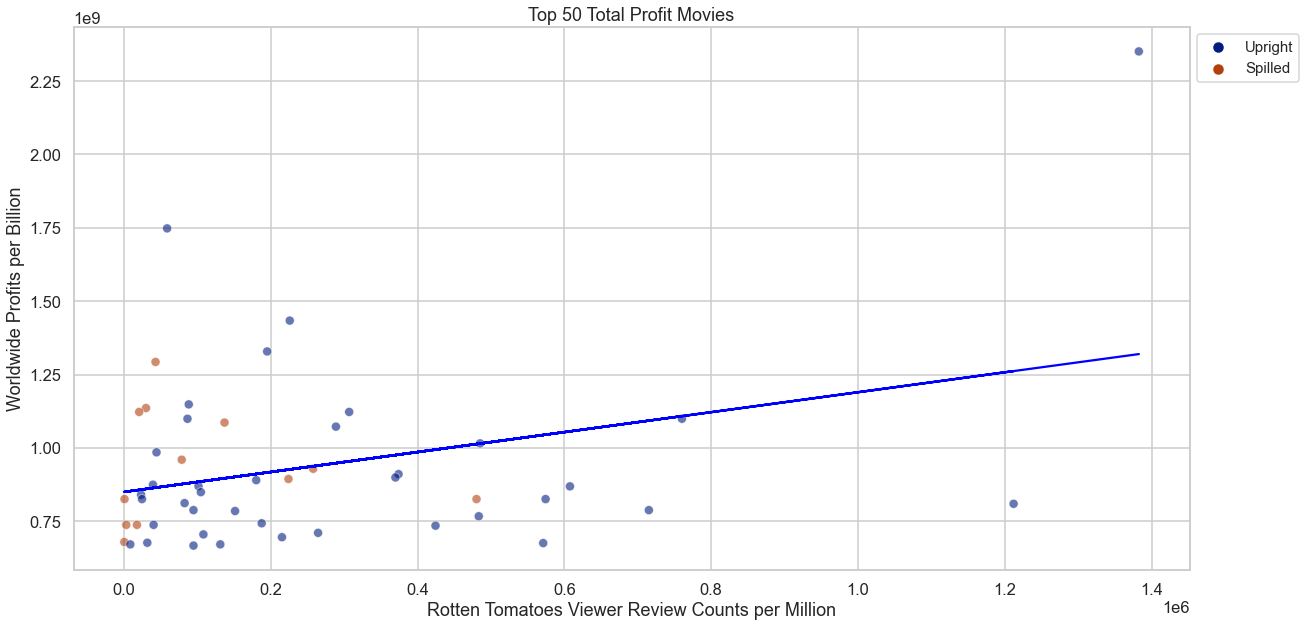

In [24]:
plt.figure(figsize=(20,10))
top_50_RT_profit_ar = sns.scatterplot(data=rotten_budget_df2, x="audience_count", y="worldwide_profit", hue="audience_status" ,palette="dark",alpha=0.6, sizes=(20, 200))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15)
top_50_RT_profit_ar.set(title="Top 50 Total Profit Movies", xlabel="Rotten Tomatoes Viewer Review Counts per Million", ylabel="Worldwide Profits per Billion")
x = rotten_budget_df2["audience_count"]
y = rotten_budget_df2["worldwide_profit"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b-");
# sns.lmplot(data = rotten_budget_df2, x =  "audience_rating", y ="worldwide_profit", legend = True, markers=".", line_kws={'color': 'red'})
# plt.savefig('Top_50_Total_Profit_Movies.png', dpi=300)

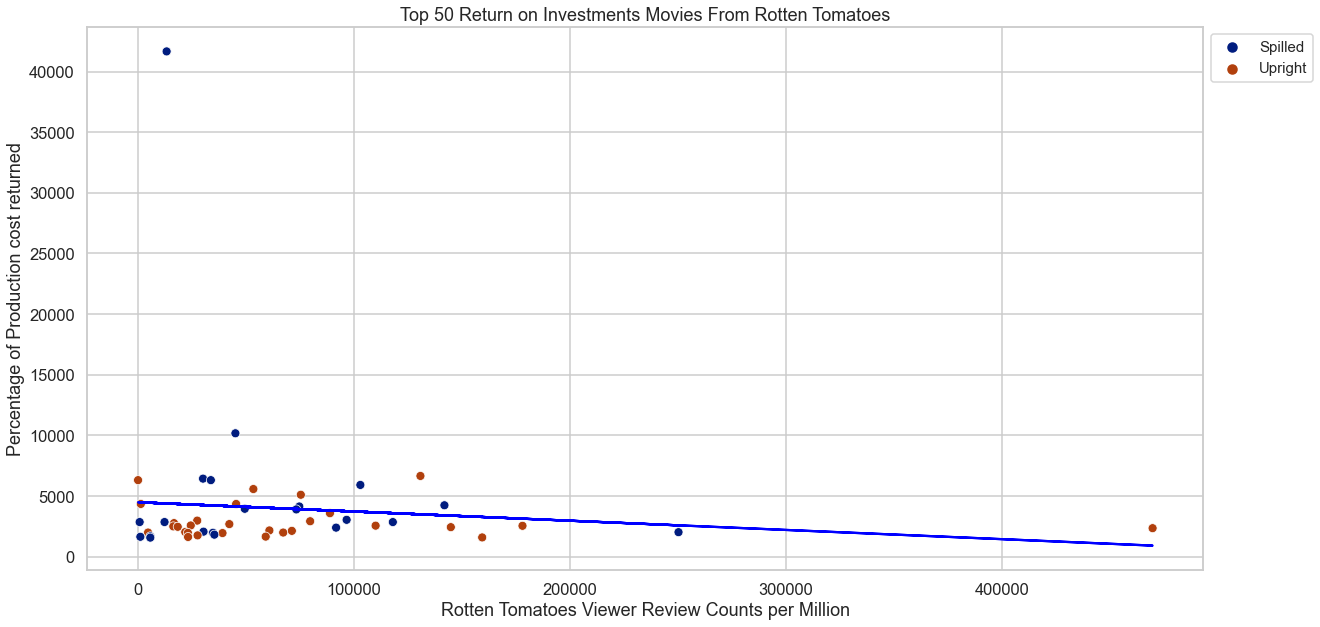

In [19]:
plt.figure(figsize=(20,10))
top_50_RT_profit_ar = sns.scatterplot(data=rotten_budget_df1, x="audience_count", y="percent_returns", hue="audience_status", palette="dark", sizes=(20, 200))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15)
top_50_RT_profit_ar.set(title="Top 50 Return on Investments Movies From Rotten Tomatoes", xlabel="Rotten Tomatoes Viewer Review Counts per Million", ylabel="Percentage of Production cost returned")
# plt.ylim(0, 10000)
# plt.xlim(0, 400000)
x = rotten_budget_df1["audience_count"]
y = rotten_budget_df1["percent_returns"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b-");

In [20]:
rotten_budget_df.value_counts("production_company").head(10)

production_company
Warner Bros. Pictures    124
Universal Pictures       117
20th Century Fox         116
Sony Pictures             86
Paramount Pictures        82
Walt Disney Pictures      58
Focus Features            45
The Weinstein Company     33
Open Road Films           31
Lionsgate Films           30
dtype: int64

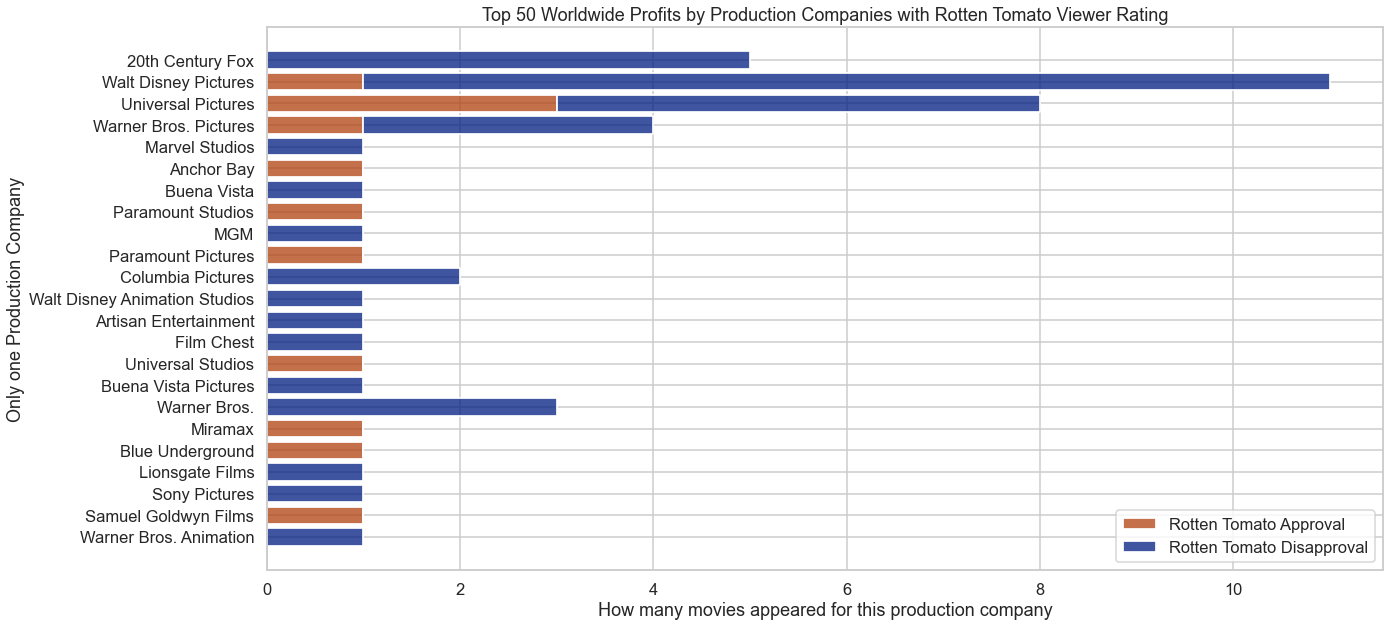

In [39]:
plt.figure(figsize=(20,10))
top_50_ProductionCompanies = sns.histplot(data=rotten_budget_df2, y="production_company", palette="dark", hue="audience_status", multiple="stack",shrink=.8)
top_50_ProductionCompanies.legend(labels=("Rotten Tomato Approval","Rotten Tomato Disapproval"))
top_50_ProductionCompanies.set(title="Top 50 Worldwide Profits by Production Companies with Rotten Tomato Viewer Rating", xlabel="How many movies appeared for this production company", ylabel="Only one Production Company");
plt.savefig('Top_50_Worldwide_Profit_by_Production_Company_with_RT_Rating.png', dpi=300)

In [53]:
genre_cleaned = clean_unique_titles.loc[clean_unique_titles["genre"].apply(lambda x: (x=='Musical') | (x=='Action') | (x=='Adventure') | (x=='Animation')|(x=='Sci-Fi')|(x=='Family')|(x=='Fantasy'))].copy()
genre_cleaned_wwprofit = genre_cleaned.sort_values("worldwide_profit", ascending=False).head(100).copy()

<AxesSubplot:xlabel='genre', ylabel='worldwide_profit'>

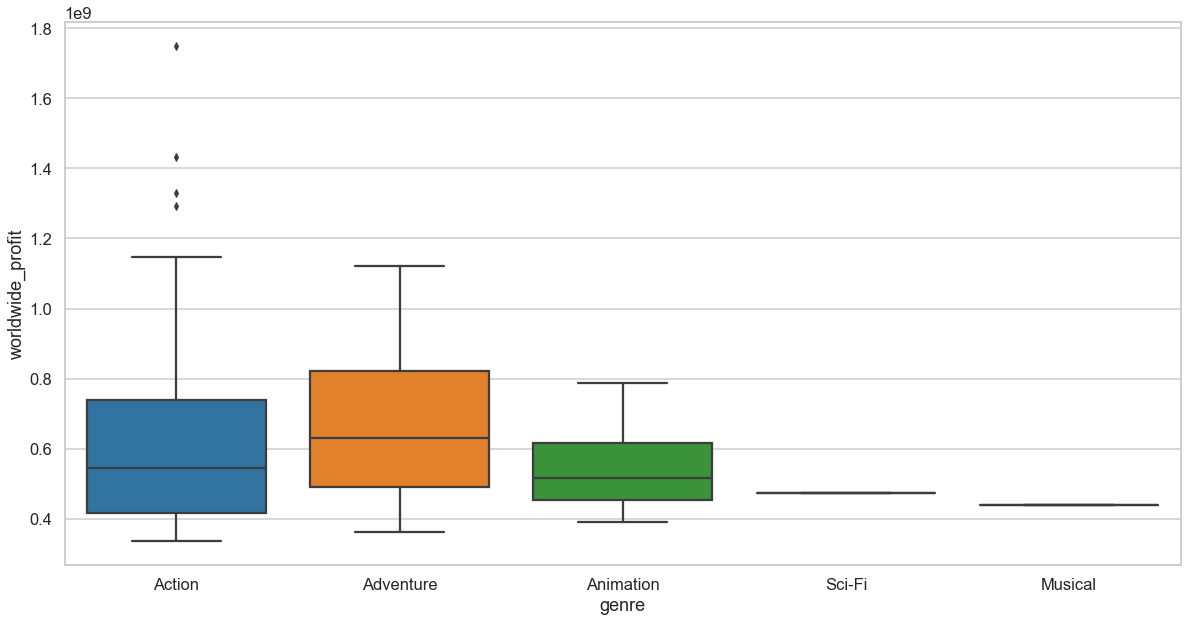

In [54]:
fig, ax = plt.subplots(figsize = (20,10))

sns.boxplot(data = genre_cleaned_wwprofit, x = "genre", y = "worldwide_profit")

<AxesSubplot:xlabel='audience_status', ylabel='worldwide_profit'>

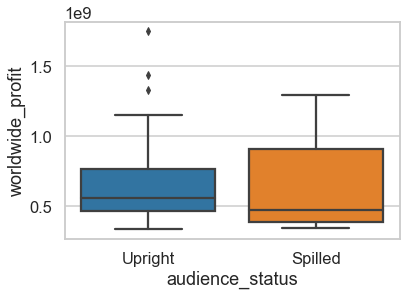

In [76]:
# fig, ax = plt.subplots(figsize = (20,10))

sns.boxplot(data = genre_cleaned_wwprofit, x = "audience_status", y = "worldwide_profit")

(0.0, 2000000.0)

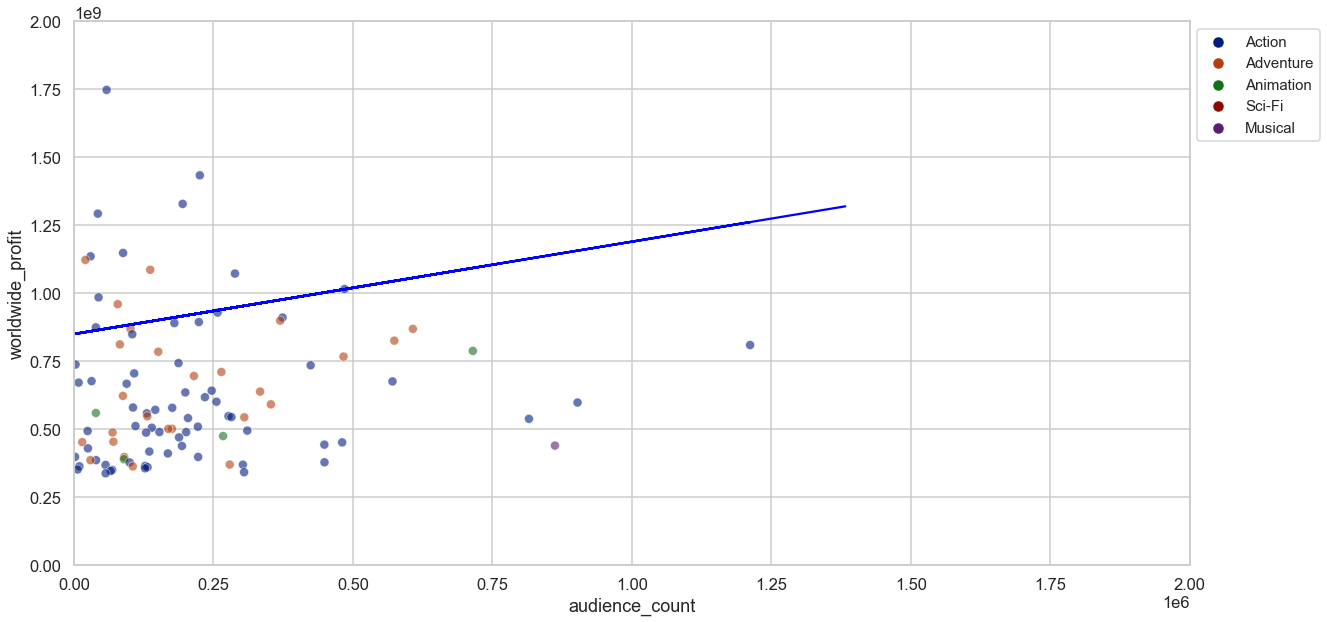

In [74]:
#RT amount of votes does have a positive relationship with profit
plt.figure(figsize=(20,10))
top_100_RT_profit_genre = sns.scatterplot(data=genre_cleaned_wwprofit, x="audience_count", y="worldwide_profit", hue="genre" ,palette="dark",alpha=0.6, sizes=(20, 200))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15)
# top_100_RT_profit_genre.set(title="Top 50 Total Profit Movies", xlabel="Rotten Tomatoes Viewer Review Counts per Million", ylabel="Worldwide Profits per Billion")
x = rotten_budget_df2["audience_count"]
y = rotten_budget_df2["worldwide_profit"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b-")
plt.ylim(0, 2000000000)
plt.xlim(0, 2000000)

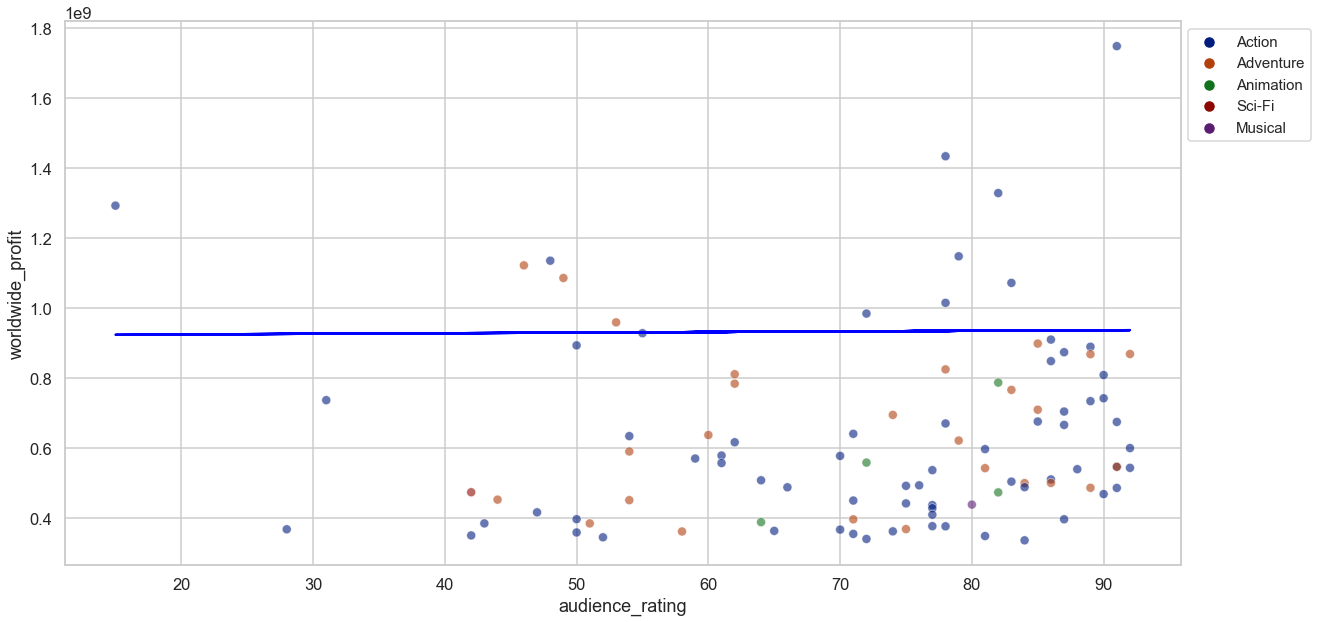

In [72]:
# Rating does not change how well the movie did
plt.figure(figsize=(20,10))
top_100_RT_profit_genre = sns.scatterplot(data=genre_cleaned_wwprofit, x="audience_rating", y="worldwide_profit", hue="genre" ,palette="dark",alpha=0.6, sizes=(20, 200))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15)
# top_100_RT_profit_genre.set(title="Top 50 Total Profit Movies", xlabel="Rotten Tomatoes Viewer Review Counts per Million", ylabel="Worldwide Profits per Billion")
x = rotten_budget_df2["audience_rating"]
y = rotten_budget_df2["worldwide_profit"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b-")
# plt.ylim(0, 2000000000)
# plt.xlim(0, 2000000)